In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [2]:
#  df=pd.read_csv('HAR.csv')


Dataset for TRaining **Durting train uncomment**

In [100]:

df=pd.read_csv('Human_Gait_Recogn.csv') 

Dataset for Testing **Durting train comment**

In [101]:
df.head()

,timeElapsed,x,y,z,label
0,0,-0.694638,12.680544,0.503953,Jogging
1,1,5.012288,11.264028,0.953424,Jogging
2,2,4.903325,10.882658,-0.081722,Jogging
3,3,-0.612916,18.496431,3.023717,Jogging
4,4,-1.184970,12.108489,7.205164,Jogging


In [102]:
df['label'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: label, dtype: int64

In [103]:
df.shape

(343416, 5)

In [104]:
df.isnull().sum()

timeElapsed    0
x              0
y              0
z              0
label          0
dtype: int64

In [105]:
df['label'].unique()

array(['Jogging', 'Walking', 'Upstairs', 'Downstairs', 'Sitting',
       'Standing'], dtype=object)

## Plot Axies of Accelerometer Dataset 

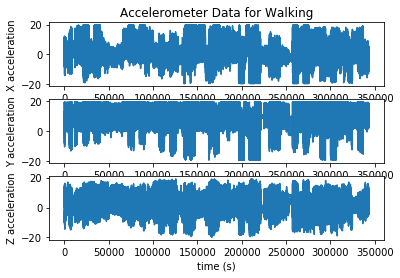

<Figure size 720x720 with 0 Axes>

In [106]:
plt.subplot(3, 1, 1)
plt.plot(df['timeElapsed'],df['x'])
plt.title('Accelerometer Data for Walking')
plt.ylabel('X acceleration')
plt.xlabel('time (s)')

plt.subplot(3, 1, 2)
plt.plot(df['timeElapsed'],df['y'])
plt.xlabel('time (s)')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(df['timeElapsed'],df['z'])
plt.xlabel('time (s)')
plt.ylabel('Z acceleration')

plt.figure(figsize=(10,10))

plt.show();

In [107]:
X_acc= df['x'].values
Y_acc= df['y'].values
Z_acc= df['z'].values

# Preprocessing Phase


### Applying Low-Pass Filter to Acceleration Signals

In [108]:
def Filter (Data):
        a=0.005  # Cofficient of filter
        S=list(Data)  #convert acc data to list
        X=[]          #empty list to append filter data in it
        for i in range(0,len(S)):
            if i==0:
                X.append(a*S[i]) 
            else:
                X.append((1-a)*X[i-1]+a*S[i]) 
        return(X)


In [109]:
X_filtered=Filter(X_acc)
Y_filtered=Filter(Y_acc)
Z_filtered=Filter(Z_acc)

C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


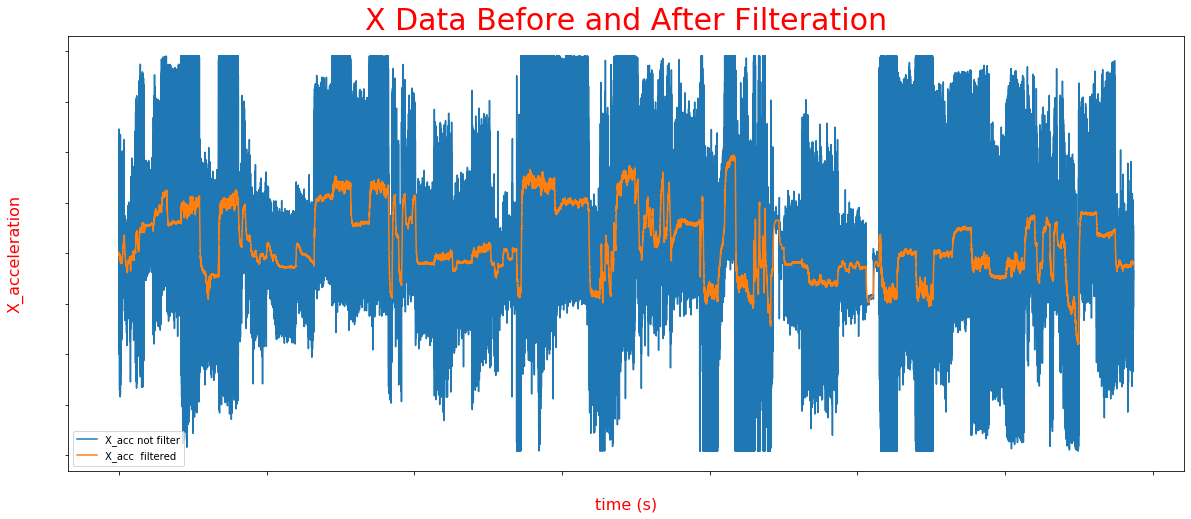

In [110]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['x'],label='X_acc not filter')
plt.plot(df['timeElapsed'],X_filtered,label='X_acc  filtered')
plt.title('X Data Before and After Filteration',color='red',fontsize=30)
plt.ylabel('X_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()


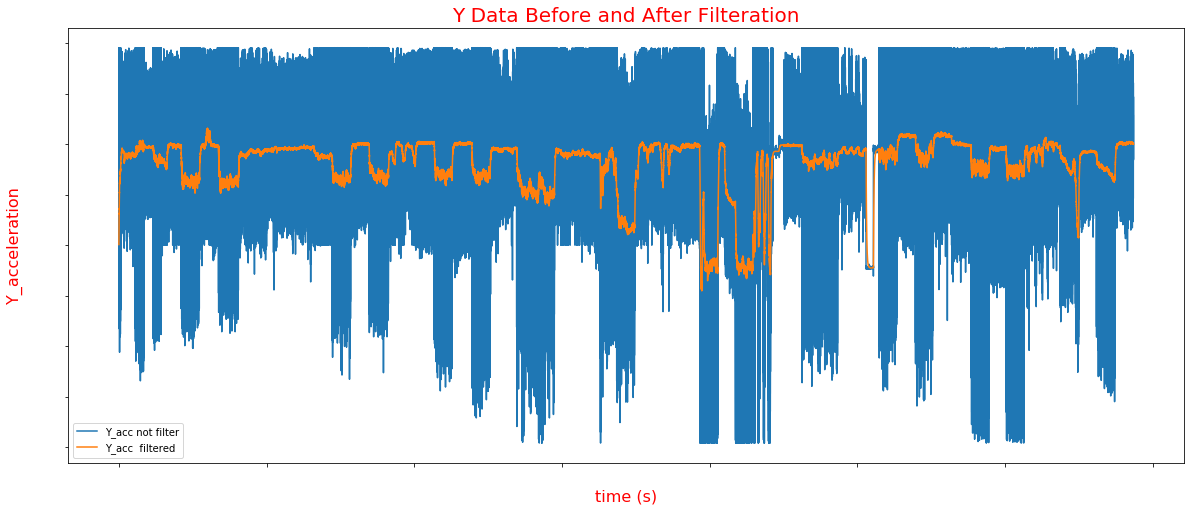

In [111]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['y'],label='Y_acc not filter')
plt.plot(df['timeElapsed'],Y_filtered,label='Y_acc  filtered')
plt.title('Y Data Before and After Filteration',color='red',fontsize=20)
plt.ylabel('Y_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

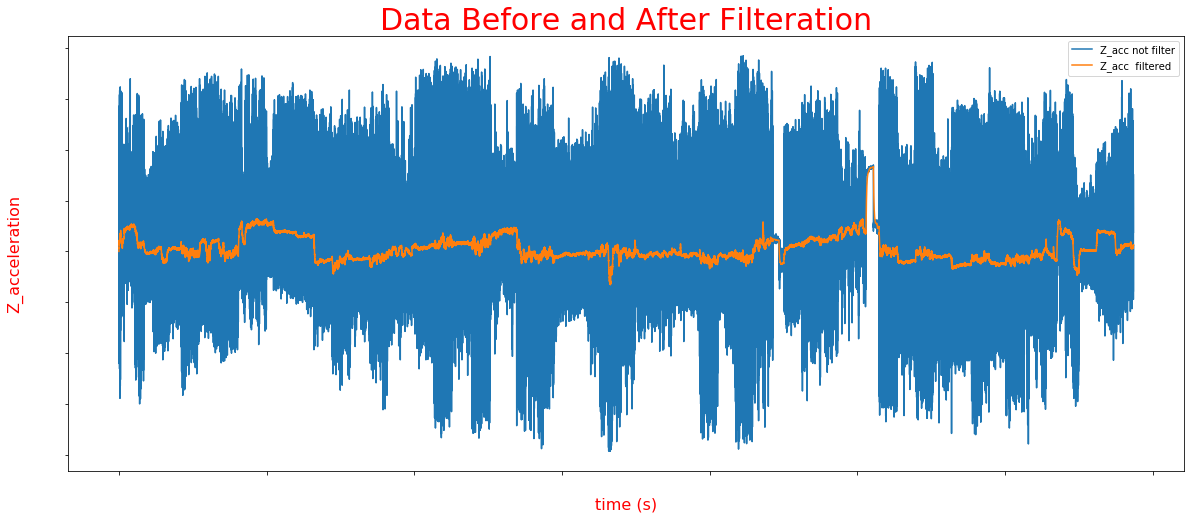

In [112]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['z'],label='Z_acc not filter')
plt.plot(df['timeElapsed'],Z_filtered,label='Z_acc  filtered')
plt.title('Data Before and After Filteration',color='red',fontsize=30)
plt.ylabel('Z_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

### Apply smoothing to data

In [113]:
from scipy.ndimage import gaussian_filter1d
X_smoothed = gaussian_filter1d(X_filtered, 6)
Y_smoothed = gaussian_filter1d(Y_filtered, 6)
Z_smoothed = gaussian_filter1d(Z_filtered, 6)


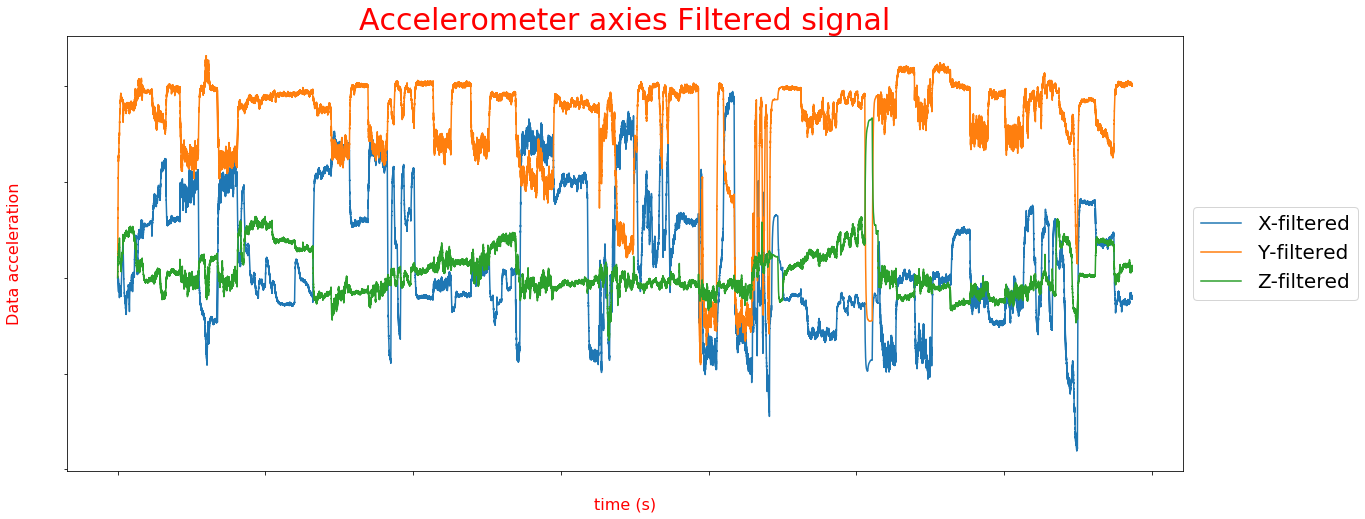

In [114]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_filtered,label='X-filtered')
plt.plot(df['timeElapsed'],Y_filtered,label='Y-filtered')
plt.plot(df['timeElapsed'],Z_filtered,label='Z-filtered')
plt.title('Accelerometer axies Filtered signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

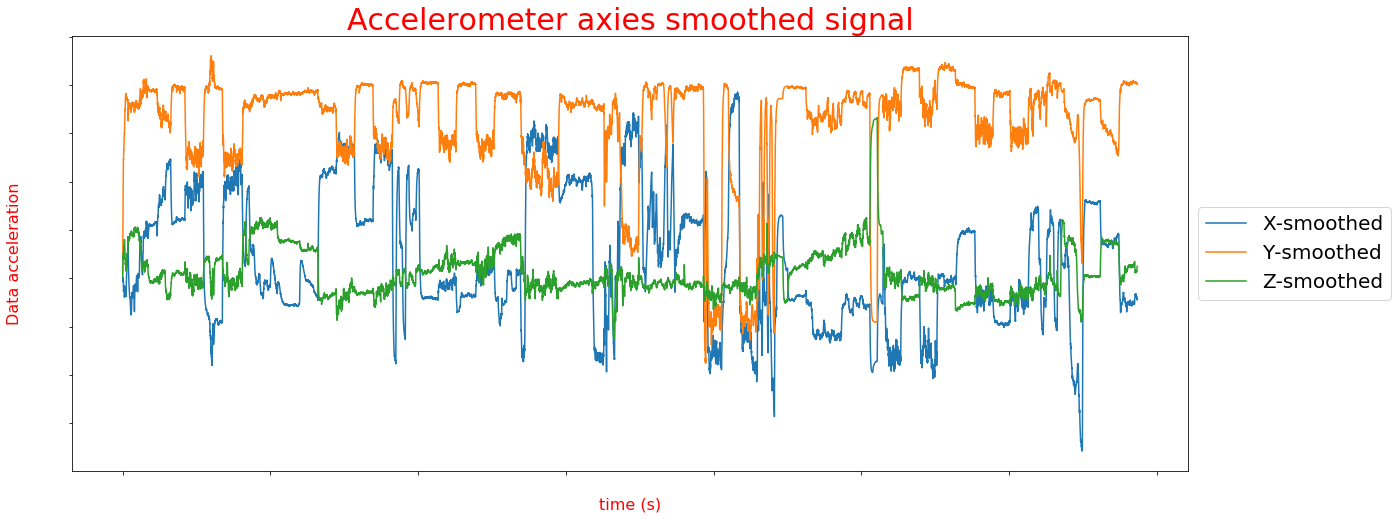

In [115]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_smoothed,label='X-smoothed')
plt.plot(df['timeElapsed'],Y_smoothed,label='Y-smoothed')
plt.plot(df['timeElapsed'],Z_smoothed,label='Z-smoothed')
plt.title('Accelerometer axies smoothed signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

## Applying FD,XYZ & Searching for Strides

In [116]:
X_smoothed_powered=np.power(X_smoothed,2)
Y_smoothed_powered=np.power(Y_smoothed,2)
Z_smoothed_powered=np.power(Z_smoothed,2)


In [117]:
Y_smoothed_powered

array([8.40175581e-02, 8.74426691e-02, 9.43743928e-02, ...,
       1.00591301e+02, 1.00596034e+02, 1.00598517e+02])

In [118]:
X_max=np.sum(X_smoothed_powered)
Y_max=np.sum(Y_smoothed_powered)
Z_max=np.sum(Z_smoothed_powered)

if (X_max >= Y_max) and (X_max >= Z_max):
       print('x')
elif (Y_max >= X_max) and (Y_max >= Z_max):
       print('y')
else:
       print('z')

y


In [119]:
FD=Y_smoothed_powered

In [120]:
FD[:1000]

array([8.40175581e-02, 8.74426691e-02, 9.43743928e-02, 1.04948618e-01,
       1.19318797e-01, 1.37610684e-01, 1.59878319e-01, 1.86081381e-01,
       2.16083251e-01, 2.49660190e-01, 2.86529528e-01, 3.26389147e-01,
       3.68943306e-01, 4.13935848e-01, 4.61173565e-01, 5.10532444e-01,
       5.61953808e-01, 6.15447557e-01, 6.71079403e-01, 7.28949332e-01,
       7.89183558e-01, 8.51919701e-01, 9.17285848e-01, 9.85387148e-01,
       1.05630727e+00, 1.13009167e+00, 1.20675321e+00, 1.28628243e+00,
       1.36864666e+00, 1.45380147e+00, 1.54170341e+00, 1.63231762e+00,
       1.72561975e+00, 1.82161307e+00, 1.92032064e+00, 2.02177111e+00,
       2.12600599e+00, 2.23306023e+00, 2.34292851e+00, 2.45557226e+00,
       2.57089223e+00, 2.68870326e+00, 2.80873420e+00, 2.93064156e+00,
       3.05399166e+00, 3.17830846e+00, 3.30310694e+00, 3.42792207e+00,
       3.55234779e+00, 3.67609276e+00, 3.79899617e+00, 3.92104985e+00,
       4.04240468e+00, 4.16333958e+00, 4.28424313e+00, 4.40558365e+00,
      

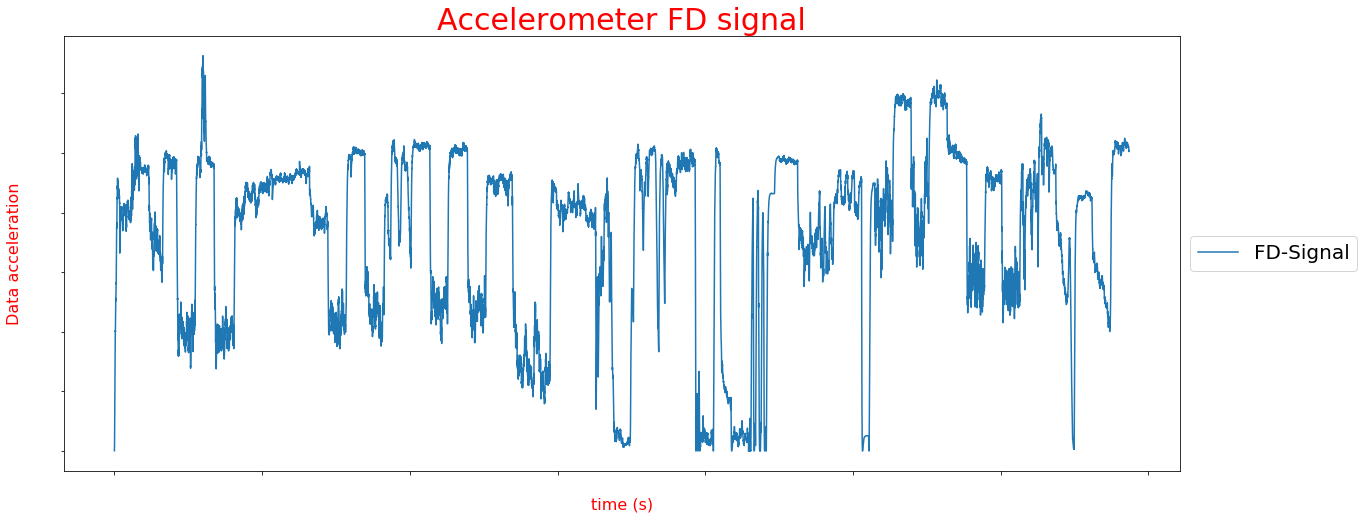

In [121]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],FD,label='FD-Signal')

plt.title('Accelerometer FD signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

In [122]:

df_XYZ=df['x']*df['x']+df['y']*df['y']+df['z']*df['z']
XYZ=df_XYZ.apply(np.sqrt)

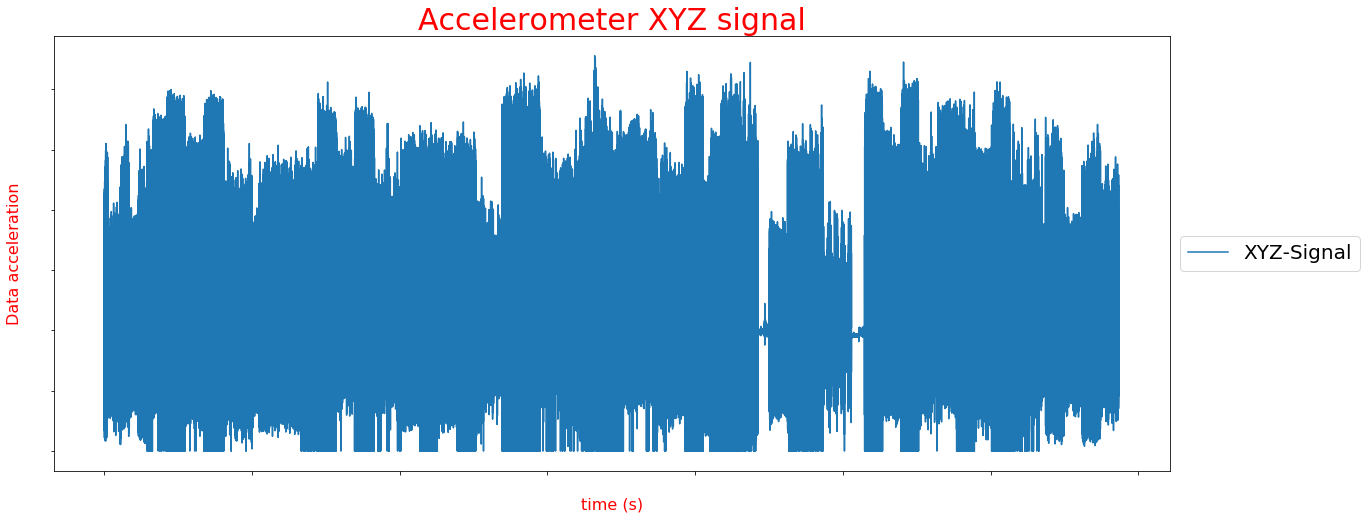

In [123]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],XYZ,label='XYZ-Signal')
plt.title('Accelerometer XYZ signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

In [124]:

# XYZ_smoothed=X_smoothed**2+Y_smoothed**2+Z_smoothed**2

In [125]:
# xyz_smoothed=pd.DataFrame(XYZ_smoothed)

In [126]:
# xyz_smoothed=xyz_smoothed.apply(np.sqrt)

In [127]:
# plt.figure(figsize=(20,8))
# plt.plot(df['timeElapsed'],xyz_smoothed,label='XYZ-Smoothed-Signal')

# plt.title('Accelerometer XYZ smoothd signal',color='red',fontsize=30)
# plt.ylabel('Data acceleration',color='red',fontsize=16)
# plt.xlabel('time (s)',color='red',fontsize=16)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
# plt.xticks(fontsize=16,color='white')
# plt.yticks(fontsize=16,color='white')

# plt.show()

## SET Peak And Valley for signal data & Perfom Segmentation 

In [128]:
peak=FD

In [129]:
peak.shape

(343416,)

In [130]:
inv_peak=peak*-1 

Get Inverse of peak to find Valley 


In [131]:
from scipy.signal import find_peaks
peak_x, _ = find_peaks(peak)  ##Detect Peaks
#valley, _ = find_peaks(inv_peak) ##detect valley

In [132]:
list_of_valley=list(peak_x)

In [133]:
len(list_of_valley)

9040

In [134]:
t=df['timeElapsed']

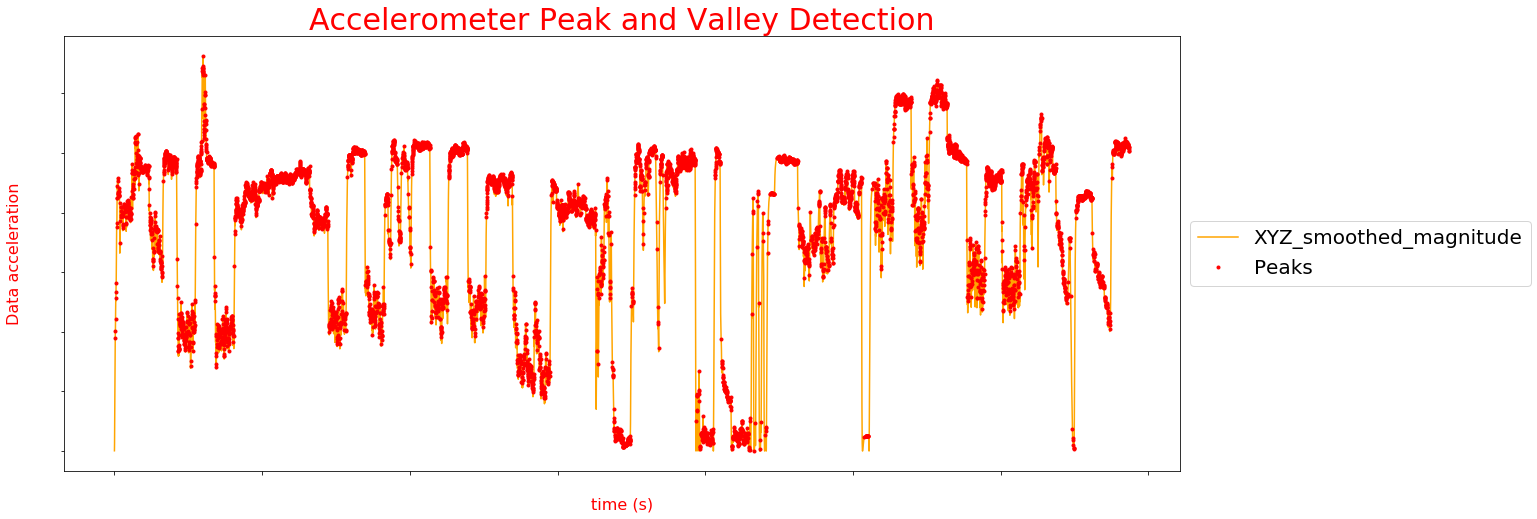

In [135]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],FD,label='XYZ_smoothed_magnitude',color='orange')
plt.plot(t[peak_x], peak[peak_x], 'r.',label='Peaks')
# plt.plot(t[valley], peak[valley], 'b.',label='valley')

plt.title('Accelerometer Peak and Valley Detection',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

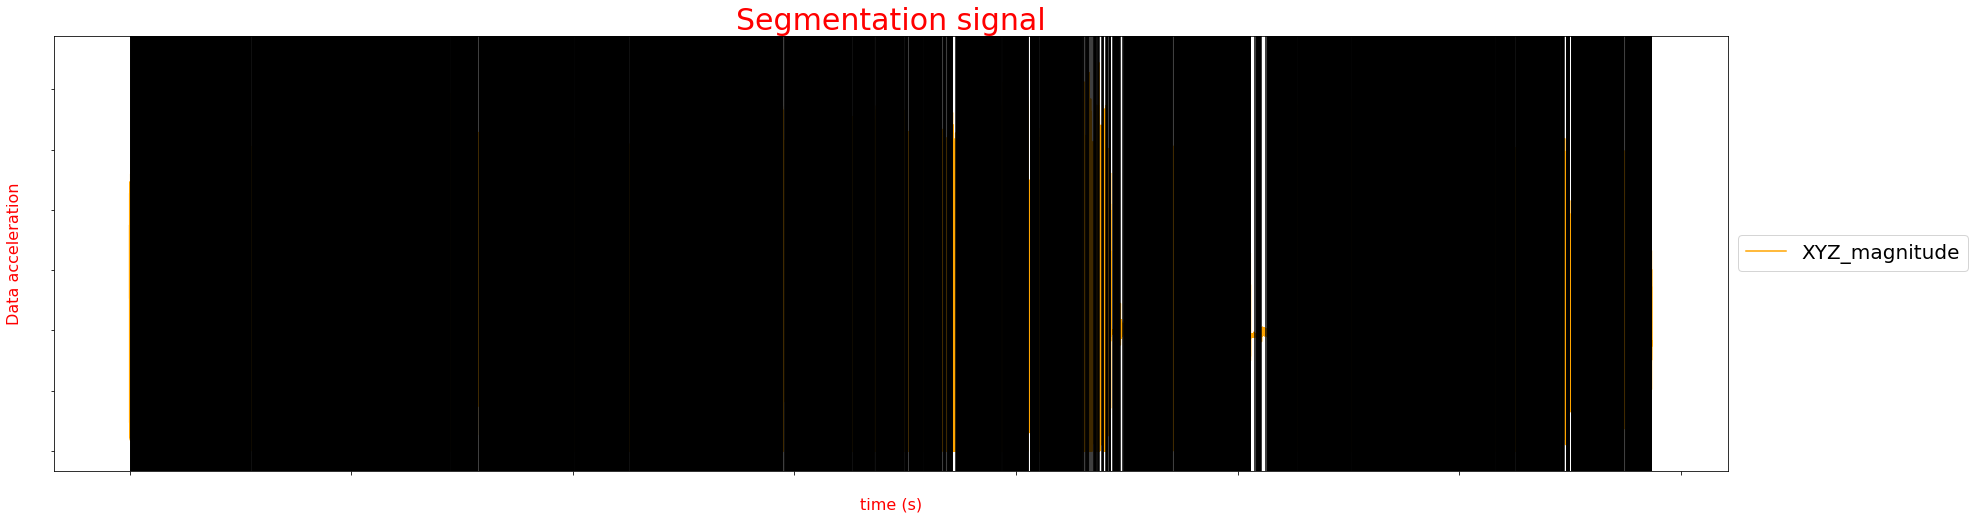

In [136]:
plt.figure(figsize=(30,8))
plt.plot(df['timeElapsed'],XYZ,label='XYZ_magnitude',color='orange')
for i in list_of_valley:
    plt.axvline(t[i],color='black')
plt.title('Segmentation signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

Calculate The Hight of each wave

In [137]:
hight_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        hight_xyz.append(max(XYZ[0:list_of_valley[0]])-min(XYZ[0:list_of_valley[0]]))
    else:
        hight_xyz.append(max(XYZ[list_of_valley[i-1]:list_of_valley[i]])-min(XYZ[list_of_valley[i-1]:list_of_valley[i]]))
hight_xyz

[22.08445818843404,
 21.17310501084375,
 20.540052615191055,
 23.31357426178711,
 21.96414598193941,
 23.850527103938575,
 23.453479666848903,
 21.45195725785547,
 23.461082636408698,
 19.395974794274817,
 20.065582159546782,
 22.159373176838088,
 21.6636047605377,
 13.86484933692964,
 13.527166007095499,
 12.93995080221815,
 12.539917365619647,
 14.265821977670742,
 13.608189182866983,
 9.864742927334454,
 12.853142423540806,
 12.774780143443358,
 14.257726364274724,
 13.719389387225375,
 13.074715836762758,
 13.54467065582783,
 15.321359822286794,
 15.135766326269373,
 12.728447420440615,
 15.912444642748891,
 14.620431318563138,
 16.290671319093352,
 16.722921519442114,
 12.98597070075189,
 12.00922549293512,
 14.547229127598047,
 12.317122787231238,
 15.254868558111344,
 15.077741979300708,
 13.620209990437964,
 14.475066216932987,
 16.243050864883937,
 15.923768089690002,
 16.77827832486149,
 16.888302986698868,
 17.69011064740513,
 16.075498776276053,
 17.079681549065615,
 13.969

Calculate the Mean of every wave

In [138]:
import statistics
mean_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        mean_xyz.append(statistics.mean(XYZ[0:list_of_valley[0]]))
    else:
        mean_xyz.append(statistics.mean(XYZ[list_of_valley[i-1]:list_of_valley[i]]))
mean_xyz

[12.140203216759733,
 11.149984200410541,
 11.998364624141654,
 12.05461173097485,
 12.308957169198063,
 12.71483366482807,
 10.799733512850715,
 10.26130928646073,
 10.692022498042114,
 10.096777422895672,
 11.33748288258006,
 10.656559593643557,
 10.432120876217423,
 9.832966683659839,
 9.88248874366815,
 9.93432995942884,
 9.500655363303144,
 10.119690595015463,
 9.798662147492378,
 9.800733854115139,
 9.713137043031159,
 9.899857175555358,
 10.353036948707592,
 9.867127994147186,
 9.585495524694183,
 9.443763771022999,
 9.764684287585268,
 9.624374163898283,
 9.29781646953782,
 9.815223563875117,
 10.133985060867385,
 9.76854143065975,
 9.654969467281212,
 9.784596559856563,
 9.71618245607859,
 9.654461336804259,
 9.95846538742021,
 9.62967532062673,
 9.597893734695315,
 10.344022063871485,
 9.61264088819574,
 9.69592684352733,
 9.68089624937464,
 10.009758322620286,
 10.303897778244886,
 9.660710058010551,
 9.952210808202466,
 9.35439928881543,
 9.866352664753089,
 9.6612746426658

Calculating the width of each wave

In [139]:
width_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        width_xyz.append(t[list_of_valley[i]]-t[0])
    else:
        width_xyz.append(t[list_of_valley[i]]-t[list_of_valley[i-1]])
width_xyz

[263,
 40,
 80,
 75,
 72,
 54,
 173,
 33,
 119,
 29,
 55,
 73,
 80,
 45,
 79,
 27,
 41,
 90,
 43,
 27,
 70,
 30,
 33,
 41,
 87,
 104,
 154,
 63,
 29,
 100,
 36,
 63,
 89,
 61,
 71,
 72,
 41,
 94,
 107,
 33,
 67,
 83,
 30,
 80,
 36,
 88,
 55,
 92,
 59,
 51,
 67,
 75,
 64,
 109,
 68,
 136,
 145,
 69,
 21,
 44,
 85,
 51,
 46,
 51,
 58,
 36,
 36,
 35,
 57,
 36,
 76,
 26,
 49,
 26,
 81,
 45,
 67,
 22,
 52,
 64,
 48,
 16,
 50,
 45,
 23,
 82,
 29,
 83,
 50,
 91,
 89,
 18,
 60,
 42,
 111,
 21,
 37,
 25,
 33,
 29,
 49,
 95,
 50,
 10,
 83,
 63,
 20,
 62,
 81,
 68,
 63,
 72,
 25,
 53,
 35,
 24,
 41,
 77,
 50,
 51,
 71,
 38,
 49,
 59,
 64,
 55,
 26,
 53,
 55,
 43,
 46,
 62,
 32,
 65,
 70,
 66,
 103,
 66,
 61,
 70,
 56,
 42,
 19,
 42,
 86,
 29,
 26,
 51,
 54,
 33,
 28,
 53,
 15,
 33,
 19,
 28,
 63,
 48,
 31,
 54,
 47,
 41,
 37,
 39,
 87,
 59,
 55,
 68,
 44,
 54,
 20,
 67,
 42,
 19,
 54,
 37,
 54,
 49,
 92,
 57,
 58,
 80,
 33,
 69,
 82,
 92,
 69,
 75,
 60,
 43,
 35,
 30,
 41,
 38,
 17,
 37,
 69,
 43

Calculating The standered deviassion of each wave

In [140]:
import statistics
std_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        std_xyz.append(statistics.stdev(XYZ[0:list_of_valley[0]]))
    else:
        std_xyz.append(statistics.stdev(XYZ[list_of_valley[i-1]:list_of_valley[i]]))
std_xyz

[6.312956398098912,
 6.726716834150719,
 6.34275795931989,
 7.127751025722911,
 6.583658792835053,
 6.787297959101093,
 5.260550039007682,
 5.193155227378751,
 4.9886715978603196,
 4.87594356982899,
 4.816941864891108,
 5.282217479930363,
 4.7757592255577626,
 2.8838120263161455,
 3.291749108140832,
 3.321523552751485,
 2.840498605833347,
 3.434538580926114,
 3.523271760432595,
 2.493975691946052,
 3.069073789845338,
 3.3307619800269417,
 3.7393783758390544,
 3.6539957521969693,
 2.8789820102800436,
 2.296339732424353,
 3.543009420847577,
 3.9012340806775816,
 3.512945965867199,
 3.75558415242386,
 3.8519430833739974,
 3.4697809522274903,
 3.7546240519471232,
 3.292840091853182,
 2.930930483922588,
 3.5808233299727847,
 2.8986250550161814,
 3.3988401574531766,
 3.3453817774497394,
 3.51454884187743,
 3.4878227674843996,
 3.8821814219294204,
 3.5696671337499035,
 3.9493010958488273,
 4.6117945076290985,
 3.8128943231396217,
 4.261164639833056,
 3.747803566150784,
 3.729326405102293,
 3.

In [141]:
list_of_valley

[263,
 303,
 383,
 458,
 530,
 584,
 757,
 790,
 909,
 938,
 993,
 1066,
 1146,
 1191,
 1270,
 1297,
 1338,
 1428,
 1471,
 1498,
 1568,
 1598,
 1631,
 1672,
 1759,
 1863,
 2017,
 2080,
 2109,
 2209,
 2245,
 2308,
 2397,
 2458,
 2529,
 2601,
 2642,
 2736,
 2843,
 2876,
 2943,
 3026,
 3056,
 3136,
 3172,
 3260,
 3315,
 3407,
 3466,
 3517,
 3584,
 3659,
 3723,
 3832,
 3900,
 4036,
 4181,
 4250,
 4271,
 4315,
 4400,
 4451,
 4497,
 4548,
 4606,
 4642,
 4678,
 4713,
 4770,
 4806,
 4882,
 4908,
 4957,
 4983,
 5064,
 5109,
 5176,
 5198,
 5250,
 5314,
 5362,
 5378,
 5428,
 5473,
 5496,
 5578,
 5607,
 5690,
 5740,
 5831,
 5920,
 5938,
 5998,
 6040,
 6151,
 6172,
 6209,
 6234,
 6267,
 6296,
 6345,
 6440,
 6490,
 6500,
 6583,
 6646,
 6666,
 6728,
 6809,
 6877,
 6940,
 7012,
 7037,
 7090,
 7125,
 7149,
 7190,
 7267,
 7317,
 7368,
 7439,
 7477,
 7526,
 7585,
 7649,
 7704,
 7730,
 7783,
 7838,
 7881,
 7927,
 7989,
 8021,
 8086,
 8156,
 8222,
 8325,
 8391,
 8452,
 8522,
 8578,
 8620,
 8639,
 8681,
 87

In [142]:
df_feature=pd.DataFrame({'Acc_Mean':mean_xyz,
                        'Acc_STD':std_xyz
                        ,'peak_height':hight_xyz
                        ,'peak_width':width_xyz})

In [143]:
df_feature.shape

(9040, 4)

In [144]:
list_of_label=[]

In [145]:
counter=0
for i in  list_of_valley:
    x=df['label'].loc[i]
    list_of_label.append(x)  

    

In [146]:
for i in range(0,len(list_of_valley)):
    print(str(i)+'------>'+str(list_of_valley[i])+'------>'+str(list_of_label[i]))

0------>263------>Jogging
1------>303------>Jogging
2------>383------>Jogging
3------>458------>Jogging
4------>530------>Jogging
5------>584------>Jogging
6------>757------>Walking
7------>790------>Walking
8------>909------>Walking
9------>938------>Walking
10------>993------>Walking
11------>1066------>Walking
12------>1146------>Walking
13------>1191------>Upstairs
14------>1270------>Upstairs
15------>1297------>Upstairs
16------>1338------>Upstairs
17------>1428------>Upstairs
18------>1471------>Upstairs
19------>1498------>Upstairs
20------>1568------>Upstairs
21------>1598------>Upstairs
22------>1631------>Upstairs
23------>1672------>Upstairs
24------>1759------>Upstairs
25------>1863------>Downstairs
26------>2017------>Downstairs
27------>2080------>Downstairs
28------>2109------>Downstairs
29------>2209------>Downstairs
30------>2245------>Downstairs
31------>2308------>Downstairs
32------>2397------>Upstairs
33------>2458------>Upstairs
34------>2529------>Upstairs
35---

1753------>61133------>Walking
1754------>61154------>Walking
1755------>61173------>Walking
1756------>61194------>Walking
1757------>61212------>Walking
1758------>61231------>Walking
1759------>61253------>Walking
1760------>61269------>Walking
1761------>61288------>Walking
1762------>61306------>Walking
1763------>61327------>Walking
1764------>61346------>Walking
1765------>61359------>Walking
1766------>61388------>Walking
1767------>61402------>Walking
1768------>61421------>Walking
1769------>61440------>Walking
1770------>61460------>Walking
1771------>61482------>Walking
1772------>61497------>Walking
1773------>61516------>Walking
1774------>61536------>Walking
1775------>61557------>Walking
1776------>61574------>Walking
1777------>61614------>Walking
1778------>61631------>Walking
1779------>61651------>Walking
1780------>61669------>Walking
1781------>61692------>Walking
1782------>61709------>Walking
1783------>61728------>Walking
1784------>61748------>Walking
1785----

3085------>105018------>Walking
3086------>105038------>Walking
3087------>105060------>Walking
3088------>105082------>Walking
3089------>105104------>Walking
3090------>105125------>Walking
3091------>105148------>Walking
3092------>105171------>Walking
3093------>105192------>Walking
3094------>105214------>Walking
3095------>105237------>Walking
3096------>105258------>Walking
3097------>105279------>Walking
3098------>105302------>Walking
3099------>105323------>Walking
3100------>105342------>Walking
3101------>105366------>Walking
3102------>105389------>Walking
3103------>105412------>Walking
3104------>105434------>Walking
3105------>105456------>Walking
3106------>105477------>Walking
3107------>105499------>Walking
3108------>105521------>Walking
3109------>105543------>Walking
3110------>105565------>Walking
3111------>105588------>Walking
3112------>105609------>Walking
3113------>105630------>Walking
3114------>105652------>Walking
3115------>105674------>Walking
3116----

4334------>152513------>Walking
4335------>152535------>Walking
4336------>152556------>Walking
4337------>152578------>Walking
4338------>152597------>Walking
4339------>152620------>Walking
4340------>152643------>Walking
4341------>152665------>Walking
4342------>152684------>Walking
4343------>152711------>Walking
4344------>152725------>Walking
4345------>152797------>Walking
4346------>152818------>Walking
4347------>152865------>Walking
4348------>152911------>Walking
4349------>152934------>Walking
4350------>152955------>Walking
4351------>152978------>Walking
4352------>153000------>Walking
4353------>153021------>Walking
4354------>153043------>Walking
4355------>153067------>Walking
4356------>153090------>Walking
4357------>153114------>Walking
4358------>153136------>Walking
4359------>153151------>Walking
4360------>153175------>Walking
4361------>153199------>Walking
4362------>153222------>Walking
4363------>153243------>Walking
4364------>153263------>Walking
4365----

5937------>222444------>Sitting
5938------>222499------>Sitting
5939------>222610------>Sitting
5940------>222634------>Sitting
5941------>222756------>Sitting
5942------>222801------>Sitting
5943------>222928------>Sitting
5944------>222987------>Sitting
5945------>223017------>Sitting
5946------>223064------>Sitting
5947------>223107------>Sitting
5948------>223224------>Sitting
5949------>223347------>Sitting
5950------>223404------>Sitting
5951------>224156------>Standing
5952------>224369------>Standing
5953------>224505------>Standing
5954------>224551------>Standing
5955------>224690------>Standing
5956------>224709------>Standing
5957------>224850------>Standing
5958------>224986------>Standing
5959------>225060------>Standing
5960------>225077------>Walking
5961------>225101------>Walking
5962------>225125------>Walking
5963------>225146------>Walking
5964------>225168------>Walking
5965------>225188------>Walking
5966------>225210------>Walking
5967------>225230------>Walking

7003------>268076------>Walking
7004------>268100------>Walking
7005------>268122------>Walking
7006------>268138------>Walking
7007------>268160------>Walking
7008------>268184------>Walking
7009------>268200------>Walking
7010------>268222------>Walking
7011------>268242------>Walking
7012------>268264------>Walking
7013------>268278------>Walking
7014------>268303------>Walking
7015------>268345------>Walking
7016------>268383------>Walking
7017------>268406------>Walking
7018------>268424------>Walking
7019------>268468------>Walking
7020------>268487------>Walking
7021------>268507------>Walking
7022------>268525------>Walking
7023------>268550------>Walking
7024------>268587------>Walking
7025------>268607------>Walking
7026------>268633------>Walking
7027------>268651------>Walking
7028------>268668------>Walking
7029------>268688------>Walking
7030------>268708------>Walking
7031------>268733------>Walking
7032------>268750------>Walking
7033------>268772------>Walking
7034----

8401------>317283------>Upstairs
8402------>317334------>Upstairs
8403------>317356------>Upstairs
8404------>317375------>Upstairs
8405------>317401------>Upstairs
8406------>317432------>Upstairs
8407------>317450------>Upstairs
8408------>317470------>Upstairs
8409------>317487------>Upstairs
8410------>317656------>Walking
8411------>317680------>Walking
8412------>317703------>Walking
8413------>317722------>Walking
8414------>317746------>Walking
8415------>317768------>Walking
8416------>317791------>Walking
8417------>317814------>Walking
8418------>317839------>Walking
8419------>317861------>Walking
8420------>317877------>Walking
8421------>317901------>Walking
8422------>317921------>Walking
8423------>317943------>Walking
8424------>317966------>Walking
8425------>317986------>Walking
8426------>318009------>Walking
8427------>318032------>Walking
8428------>318054------>Walking
8429------>318076------>Walking
8430------>318122------>Walking
8431------>318144------>Walking

In [147]:
df_feature['label']=list_of_label

In [148]:
df_feature['label'].value_counts()

Walking       4954
Jogging       2385
Upstairs       944
Downstairs     705
Sitting         35
Standing        17
Name: label, dtype: int64

In [149]:
df_feature.head()

,Acc_Mean,Acc_STD,peak_height,peak_width,label
0,12.140203,6.312956,22.084458,263,Jogging
1,11.149984,6.726717,21.173105,40,Jogging
2,11.998365,6.342758,20.540053,80,Jogging
3,12.054612,7.127751,23.313574,75,Jogging
4,12.308957,6.583659,21.964146,72,Jogging


In [150]:
X=df_feature.drop(columns=['label']).values
y=df_feature['label']

In [151]:
X.shape

(9040, 4)

In [152]:
y.shape

(9040,)

# Classification Phase

> **You Can Comment and Uncomment using ( ctrl + / ) **

> **You Can found this  /   in numpad idot  :D**

### Splitting data to train and test

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=49)

During train uncomment this cell

In [52]:
print('X_train_shape ---->',X_train.shape)
print('X_test_shape ---->',X_test.shape)
print('Y_train_shape ---->',y_train.shape)
print('Y_test_shape ---->',y_test.shape)

X_train_shape ----> (23098, 4)
X_test_shape ----> (9900, 4)
Y_train_shape ----> (23098,)
Y_test_shape ----> (9900,)


During train uncomment this cell

### Preprocessimg label data and feature

In [153]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_labeled=le.fit_transform(y)
# y_labeled_test=le.transform(y_test)

np.unique(y_labeled)

array([0, 1, 2, 3, 4, 5])

In [155]:
z

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

In [154]:
z=le.inverse_transform(np.unique(y_labeled))


During train uncomment this line and change y to y_train

In [156]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_Scaler_train=sc.fit_transform(X)
# x_Scaler_test=sc.transform(X_test)
x_Scaler_train.shape


(9040, 4)

During train uncomment this line and change X to X_train

### Using Support vector machine Classification

In [83]:
from sklearn.svm import SVC
classifier_SVC=SVC(kernel = 'rbf')
classifier_SVC.fit(x_Scaler_train,y_labeled)
cv_svm_train = cross_val_score(classifier_SVC , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data SVC is : ", cv_svm_train)
cv_svm_test = cross_val_score(classifier_SVC , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data SVC is  : ", cv_svm_test)



Cross validation for train data SVC is :  [0.73038961 0.72697753 0.72100273]
Cross validation for test data SVC is  :  [0.6969697  0.69121212 0.70181818]


During train uncomment this cell

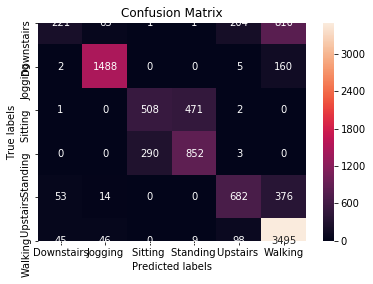

In [84]:
y_pred_SVC=classifier_SVC.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test,y_pred_SVC)
# print("Confusion matrix is : ", cm)
# plt.figure(figsize=(8,6))
# annot_kws = {"ha": 'left',"va": 'center','size': 9}
# sns.heatmap(cm,annot=True,annot_kws=annot_kws,fmt='d')
ax= plt.subplot()

sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

#plt.savefig('CM_SVC.png')

During train uncomment this cell

### Using KNN Classification

In [85]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 4)
classifier_KNN.fit(x_Scaler_train, y_labeled)
cv_knn_train = cross_val_score(classifier_KNN , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data KNN is : ", cv_knn_train)
cv_knn_test = cross_val_score(classifier_KNN , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data KNN is : ", cv_knn_test)


Cross validation for train data KNN is :  [0.77935065 0.7772438  0.77633459]
Cross validation for test data KNN is :  [0.76787879 0.76242424 0.77757576]


During train uncomment this cell

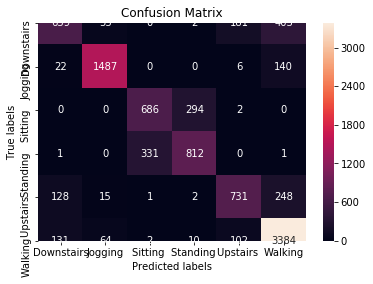

In [86]:
y_pred_Knn = classifier_KNN.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_Knn)
ax= plt.subplot()

sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);


During train uncomment this cell

### Using Random forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 49)
classifier_RF.fit(x_Scaler_train, y_labeled)
cv_rf_train = cross_val_score(classifier_RF , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data RF is : ", cv_rf_train)
cv_rf_test = cross_val_score(classifier_RF , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data RF is : ", cv_rf_test)



Cross validation for train data RF is :  [0.82103896 0.82088583 0.81958696]
Cross validation for test data RF is :  [0.81666667 0.80666667 0.80787879]


During train uncomment this cell

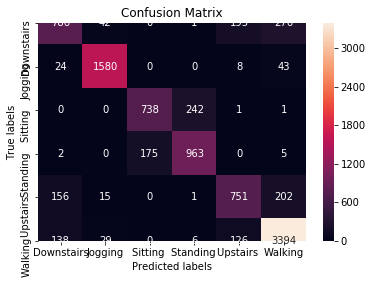

In [88]:
y_pred_RF= classifier_RF.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_RF)
ax= plt.subplot()

sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);
#plt.savefig('CM_RF.png')

During train uncomment this cell

### Using Decision Tree Classifier

In [95]:
from sklearn import tree
classifier_DT = tree.DecisionTreeClassifier(max_depth = 11)
classifier_DT.fit(x_Scaler_train, y_labeled)
cv_dt_train = cross_val_score(classifier_DT , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data DT is : ", cv_dt_train)
cv_dt_test = cross_val_score(classifier_DT , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data DT is : ", cv_dt_test)


Cross validation for train data DT is :  [0.7974026  0.78581634 0.79244058]
Cross validation for test data DT is :  [0.78       0.77454545 0.79090909]


During train uncomment this cell

Confusion matrix is :  [[ 676   51    0    0  208  365]
 [  43 1518    0    0   16   78]
 [   0    0  651  330    1    0]
 [   0    1  155  982    1    6]
 [ 142   19    0    0  722  242]
 [ 188   17    0    9  134 3345]]


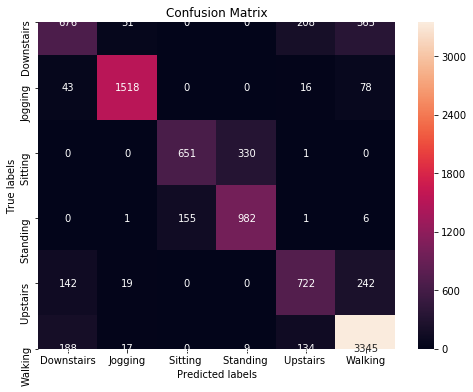

In [96]:
y_pred_DT=classifier_DT.predict(x_Scaler_test)

cm = confusion_matrix(y_labeled_test, y_pred_DT)
print("Confusion matrix is : ", cm)
plt.figure(figsize=(8,6))

ax= plt.subplot()

sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Using Navie Bayes Classifier

In [97]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(x_Scaler_train, y_labeled)
cv_nv_train = cross_val_score(classifier_NB , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data NB is : ", cv_nv_train)
cv_nv_test = cross_val_score(classifier_NB , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data NB is : ", cv_nv_test)


Cross validation for train data NB is :  [0.66181818 0.66190414 0.66008573]
Cross validation for test data NB is :  [0.68393939 0.67454545 0.67545455]


During train uncomment this cell

Confusion matrix is :  [[  63   73    0    0  144 1020]
 [  12 1353    0    0    3  287]
 [   0    0  486  490    5    1]
 [   1    0  165  957   14    8]
 [  65   26    0    0  414  620]
 [ 107  193    0    0   81 3312]]


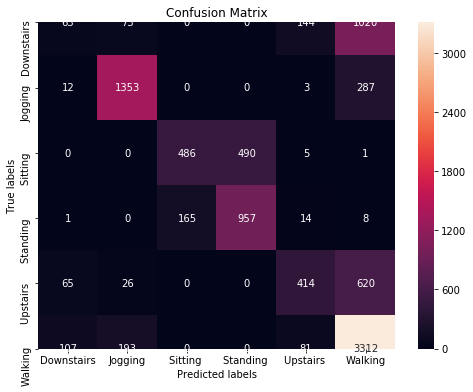

In [98]:
y_pred_NB = classifier_NB.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_NB)
print("Confusion matrix is : ", cm)
plt.figure(figsize=(8,6))

ax= plt.subplot()

sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Showing Accuracy using accuracy_score

In [99]:
from sklearn.metrics import  accuracy_score

print('Accuracy of SVC          --------->',round(accuracy_score(y_labeled_test, y_pred_SVC),2))
print('Accuracy of Desicion Tree--------->',round(accuracy_score(y_labeled_test, y_pred_DT),2))
print('Accuracy of Random forest--------->',round(accuracy_score(y_labeled_test, y_pred_RF),2))
print('Accuracy of KNN          --------->',round(accuracy_score(y_labeled_test, y_pred_Knn),2))
print('Accuracy of Navie Bayes  --------->',round(accuracy_score(y_labeled_test, y_pred_NB),2))  

Accuracy of SVC          ---------> 0.73
Accuracy of Desicion Tree---------> 0.8
Accuracy of Random forest---------> 0.83
Accuracy of KNN          ---------> 0.78
Accuracy of Navie Bayes  ---------> 0.67


During train uncomment this cell

In [157]:
y_prediction_test_SVC=classifier_SVC.predict(x_Scaler_train)
y_prediction_test_KNN=classifier_KNN.predict(x_Scaler_train)
y_prediction_test_RF=classifier_RF.predict(x_Scaler_train)
y_prediction_test_DT=classifier_DT.predict(x_Scaler_train)
y_prediction_test_NB=classifier_NB.predict(x_Scaler_train)


During train **comment** this cell

In [158]:
print('Accuracy of SVC          --------->',round(accuracy_score(y_labeled, y_prediction_test_SVC),2))
print('Accuracy of Desicion Tree--------->',round(accuracy_score(y_labeled, y_prediction_test_KNN),2))
print('Accuracy of Random forest--------->',round(accuracy_score(y_labeled, y_prediction_test_RF),2))
print('Accuracy of KNN          --------->',round(accuracy_score(y_labeled, y_prediction_test_DT),2))
print('Accuracy of Navie Bayes  --------->',round(accuracy_score(y_labeled, y_prediction_test_NB),2))

Accuracy of SVC          ---------> 0.43
Accuracy of Desicion Tree---------> 0.38
Accuracy of Random forest---------> 0.24
Accuracy of KNN          ---------> 0.23
Accuracy of Navie Bayes  ---------> 0.55


Confusion matrix is :  [[ 14  90  32 205]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]


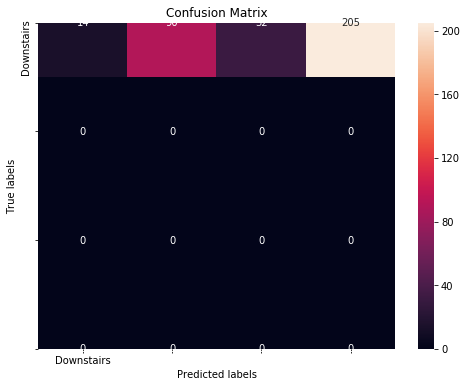

In [133]:
cm = confusion_matrix(y_labeled, y_prediction_test_KNN)
print("Confusion matrix is : ", cm)
plt.figure(figsize=(8,6))

ax= plt.subplot()

sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train **comment** this cell